In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# data set is in another folder which is in the same level as this folder, not the file

# Loading the cleaned dataset from earlier
data = pd.read_csv('../data/TMDB_cleaned.csv')

In [3]:
data.head()

,id,title,adult,backdrop_path,imdb_id,overview,genres,production_companies,keywords
0,1,Inception,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,tt1375666,"Cobb, a skilled thief who commits corporate es...","Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","rescue, mission, dream, airplane, paris, franc..."
1,2,Interstellar,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,tt0816692,The adventures of a group of explorers who mak...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","rescue, future, spacecraft, race against time,..."
2,3,The Dark Knight,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,tt0468569,Batman raises the stakes in his war on crime. ...,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","joker, sadism, chaos, secret identity, crime f..."
3,4,Avatar,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,tt0499549,"In the 22nd century, a paraplegic Marine is di...","Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","future, society, culture clash, space travel, ..."
4,5,The Avengers,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,tt0848228,When an unexpected enemy emerges and threatens...,"Science Fiction, Action, Adventure",Marvel Studios,"new york city, superhero, shield, based on com..."


In [4]:
# Getting an idea on the shape of the data and performing EDA on the data

print(data.shape)
for feature in data.columns:
    print(feature)

(93123, 9)
id
title
adult
backdrop_path
imdb_id
overview
genres
production_companies
keywords


# Since this is the cleaned data that has been loaded, we can solely focus on the EDA and map/plot some of the key features of the dataset which are as follows:
- Genre Distribution.
- Uniqe keywords.
- Keywords and genre correlation.
- Production Companies.
- Adult vs Non Adult Movies.
- Avergae length of movies.
- Keyword frequency based on the presence of adult content.

In [5]:
# Lets take a look all the distinct genres in the dataset
genres = set()
keywords = set()

for genre in data['genres']:
    for g in genre.split(','):
        genres.add(g)

for keyword in data['keywords']:
    for k in keyword.split(','):
        keywords.add(k)

#pretty print the genres
print(genres)
print(keywords)


{'Animation', ' Horror', ' Adventure', ' Thriller', ' History', 'Fantasy', ' Western', ' War', 'Drama', ' Action', 'Adventure', 'Family', 'History', 'Comedy', 'Science Fiction', ' Comedy', ' Crime', ' Music', ' Fantasy', 'Crime', 'Documentary', ' TV Movie', 'Romance', 'Western', 'Mystery', ' Romance', ' Science Fiction', ' Drama', 'Action', 'TV Movie', 'Horror', 'War', ' Documentary', 'Thriller', ' Animation', 'Music', ' Mystery', ' Family'}
{' fishnets', ' paganism', ' head crushing', ' coronation', ' stable boy', ' lovestory', 'crime scene', ' queer coded', ' young sisters', ' little girl in peril', 'pen pals', ' insect', ' patrol boats', ' corporate greed', ' agamemnon', ' boxing trainer', ' forest resort', ' evil child', ' ill girl', ' totalitarian', ' abandoned town', ' huang feihong', ' yodeler', 'florist', ' chanting', ' toy soldier', ' black slave', ' heaven', ' military uniform', 'suitcase', ' horror novelist', 'pornographer', ' dog fighting', ' australian rules football', 'so

## Plotting / Finding correlation between different keywords and genres

<Axes: title={'center': 'Top Keywords Shared Across Genres'}, ylabel='keywords'>

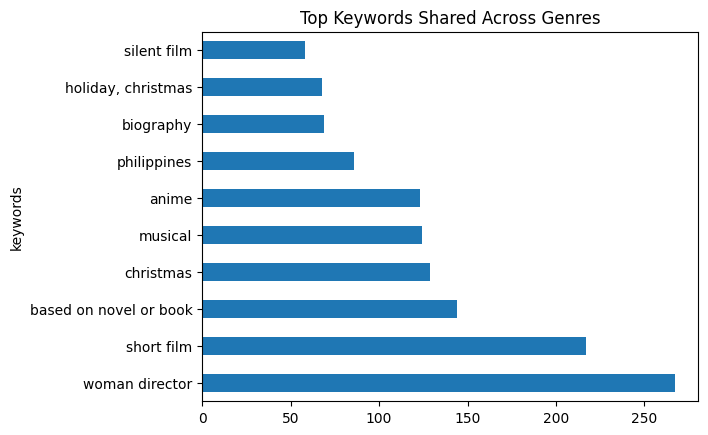

In [6]:
keyword_genre_counts = data.explode('genres').explode('keywords').groupby('keywords')['genres'].nunique().sort_values(ascending=False) # seperating the genres and keywords and counting the number of unique genres for each keyword
keyword_genre_counts.head(10).plot(kind='barh', title='Top Keywords Shared Across Genres')

In [7]:
# keyword-genre association frequency
genre_keyword_counts = data.explode('genres').explode('keywords').groupby(['genres', 'keywords']).size().unstack(fill_value=0)
total_keyword_counts = data.explode('keywords').groupby('keywords').size()
genre_keyword_strength = genre_keyword_counts.div(total_keyword_counts, axis=1)
sns.heatmap(genre_keyword_strength, cmap='coolwarm', annot=False)


<Axes: xlabel='keywords', ylabel='genres'>

Error in callback <function _draw_all_if_interactive at 0x0000017C992FA320> (for post_execute), with arguments args (),kwargs {}:


MemoryError: Unable to allocate 14.6 GiB for an array with shape (6675, 73214, 4) and data type float64

MemoryError: Unable to allocate 3.64 GiB for an array with shape (6675, 73214) and data type int64

<Figure size 640x480 with 2 Axes>